In [27]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pyodbc
import pandas as pd

# Connection details
conn_str = (
    r'DRIVER={SQL Server};'
    r'SERVER=mlinfomap.net;'
    r'DATABASE=AI_ML_VTS;'
    r'UID=sa;'
    r'PWD=Intel@1968;'
)

# Establish connection
conn = pyodbc.connect(conn_str)

# Execute the stored procedure
query = """
EXEC GetTransporterViolationsUsingInvoice_Fast;
"""
df = pd.read_sql(query, conn)

# Close connection
conn.close()


C:\Users\MLINF\AppData\Local\Temp\ipykernel_8264\1982812593.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [23]:
# Assume df is the DataFrame containing the results from your stored procedure
print(df.head())

              TransportersName  Truck_Count  Invoice_Count  \
0               ARYA TRANSPORT           11            754   
1         AWADHESH KUMAR SINGH           19           1558   
2           ADITYA ENTERPRISES            6            401   
3        RAVI TRANSPORT AGENCY            5            440   
4  BABA BAIDYANATH ENTERPRISES            7            554   

   Route_Violation_Count  Speed_Violation_Count  Stoppage_Violation_Count  \
0                     26                      1                        43   
1                     48                      1                       102   
2                      9                     31                        47   
3                     62                      7                       104   
4                    191                      2                       158   

   Night_Violation_Count  Total_Violations  AverageViolationsPerTruck  
0                      8                78                   7.090909  
1                   

In [25]:
df['ViolationDensity'] = df['Total_Violations'] / df['Truck_Count']
df['ViolationRatePerInvoice'] = df['Total_Violations'] / df['Invoice_Count']

In [53]:
print(df.describe())

       Truck_Count  Invoice_Count  Route_Violation_Count  \
count    10.000000      10.000000              10.000000   
mean      8.000000     671.900000              75.000000   
std       4.898979     433.948909              66.616648   
min       1.000000     106.000000               8.000000   
25%       5.250000     410.750000              30.500000   
50%       6.500000     527.000000              50.000000   
75%      10.500000     928.000000             128.000000   
max      19.000000    1558.000000             191.000000   

       Speed_Violation_Count  Stoppage_Violation_Count  Night_Violation_Count  \
count              10.000000                 10.000000              10.000000   
mean               25.500000                145.000000              39.500000   
std                43.143816                107.737335              29.519297   
min                 1.000000                 42.000000               5.000000   
25%                 2.250000                 60.750000

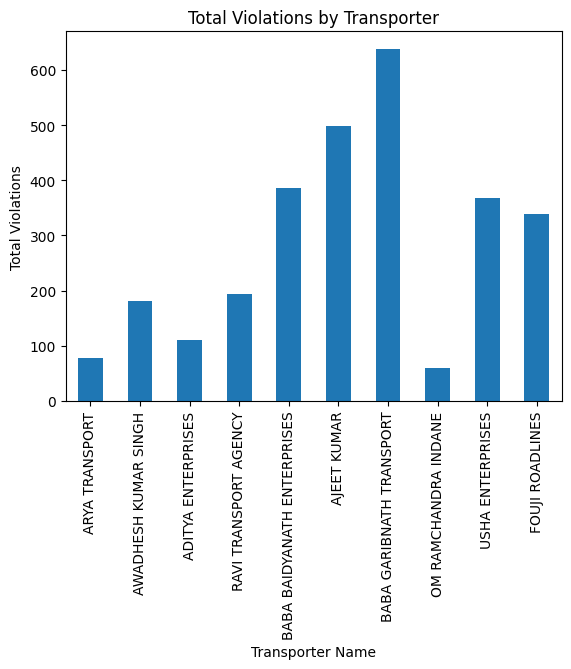

In [28]:
import matplotlib.pyplot as plt

df.set_index('TransportersName')['Total_Violations'].plot(kind='bar')
plt.title('Total Violations by Transporter')
plt.xlabel('Transporter Name')
plt.ylabel('Total Violations')
plt.xticks(rotation=90)
plt.show()


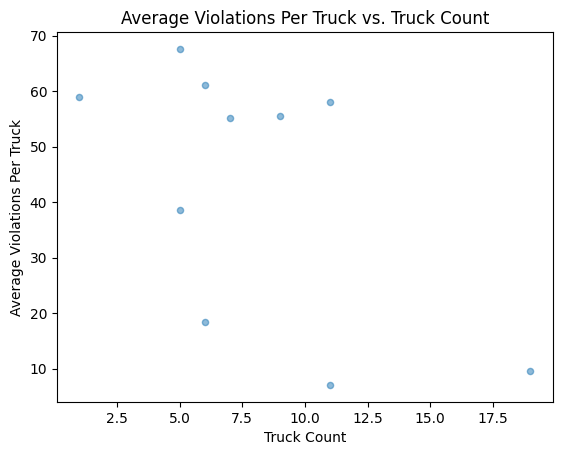

In [29]:
df.plot(kind='scatter', x='Truck_Count', y='AverageViolationsPerTruck', alpha=0.5)
plt.title('Average Violations Per Truck vs. Truck Count')
plt.xlabel('Truck Count')
plt.ylabel('Average Violations Per Truck')
plt.show()


In [54]:
# Feature Engineering for the forecasting model
# Include features like month and year if available in the historical data
df['Month'] = pd.to_datetime(df['Date']).dt.month  # Ensure 'Date' is in your DataFrame
df['Year'] = pd.to_datetime(df['Date']).dt.year

KeyError: 'Date'

In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df contains historical data including the columns mentioned

# Update with necessary features
features = ['Truck_Count', 'Invoice_Count', 'Route_Violation_Count',
             'Speed_Violation_Count', 'Stoppage_Violation_Count',
             'Night_Violation_Count']
target = 'Total_Violations'

# Prepare data for forecasting
X = df[features]
y = df[target]

# Train the model to forecast total violations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data to evaluate performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

def forecast_future(month, year, model, historical_data):
    # Create future data frame with realistic assumptions
    future_data = pd.DataFrame({
        'Truck_Count': [historical_data['Truck_Count'].mean()] * 10,  # Replace with actual forecast assumptions
        'Invoice_Count': [historical_data['Invoice_Count'].mean()] * 10,
        'Route_Violation_Count': [historical_data['Route_Violation_Count'].mean()] * 10,
        'Speed_Violation_Count': [historical_data['Speed_Violation_Count'].mean()] * 10,
        'Stoppage_Violation_Count': [historical_data['Stoppage_Violation_Count'].mean()] * 10,
        'Night_Violation_Count': [historical_data['Night_Violation_Count'].mean()] * 10
    })
    
    # Predict future violations
    future_data['Predicted_Total_Violations'] = model.predict(future_data)
    
    # Sort and get top 10 transporters
    top_10_future = future_data.nlargest(10, 'Predicted_Total_Violations')
    
    return top_10_future

# Example usage
future_month = 8  # August
future_year = 2024
top_10_forecasted = forecast_future(future_month, future_year, model, df)

print(top_10_forecasted)



Mean Squared Error: 3936.620433333333
   Truck_Count  Invoice_Count  Route_Violation_Count  Speed_Violation_Count  \
0          8.0          671.9                   75.0                   25.5   
1          8.0          671.9                   75.0                   25.5   
2          8.0          671.9                   75.0                   25.5   
3          8.0          671.9                   75.0                   25.5   
4          8.0          671.9                   75.0                   25.5   
5          8.0          671.9                   75.0                   25.5   
6          8.0          671.9                   75.0                   25.5   
7          8.0          671.9                   75.0                   25.5   
8          8.0          671.9                   75.0                   25.5   
9          8.0          671.9                   75.0                   25.5   

   Stoppage_Violation_Count  Night_Violation_Count  Predicted_Total_Violations  
0          

In [49]:
def get_user_input():
    month = int(input("Enter the future month (1-12): "))
    year = int(input("Enter the future year (e.g., 2024): "))
    return month, year

# Capture user input
future_month, future_year = get_user_input()
top_10_forecasted = forecast_future(future_month, future_year, model, df)

print(top_10_forecasted)


Enter the future month (1-12):  8
Enter the future year (e.g., 2024):  2024


   Truck_Count  Invoice_Count  Route_Violation_Count  Speed_Violation_Count  \
0          8.0          671.9                   75.0                   25.5   
1          8.0          671.9                   75.0                   25.5   
2          8.0          671.9                   75.0                   25.5   
3          8.0          671.9                   75.0                   25.5   
4          8.0          671.9                   75.0                   25.5   
5          8.0          671.9                   75.0                   25.5   
6          8.0          671.9                   75.0                   25.5   
7          8.0          671.9                   75.0                   25.5   
8          8.0          671.9                   75.0                   25.5   
9          8.0          671.9                   75.0                   25.5   

   Stoppage_Violation_Count  Night_Violation_Count  Predicted_Total_Violations  
0                     145.0                   39.

              TransportersName  Truck_Count  Invoice_Count  \
6     BABA GARIBNATH TRANSPORT           11            986   
5                  AJEET KUMAR            9           1104   
4  BABA BAIDYANATH ENTERPRISES            7            554   
8             USHA ENTERPRISES            6            500   
9              FOUJI ROADLINES            5            316   
3        RAVI TRANSPORT AGENCY            5            440   
1         AWADHESH KUMAR SINGH           19           1558   
2           ADITYA ENTERPRISES            6            401   
0               ARYA TRANSPORT           11            754   
7         OM RAMCHANDRA INDANE            1            106   

   Route_Violation_Count  Speed_Violation_Count  Stoppage_Violation_Count  \
6                    160                      3                       376   
5                    150                      6                       274   
4                    191                      2                       158   
8        

In [52]:
import joblib

# Save the model
joblib.dump(regressor, 'D:/Akash_Tripathi/Data/forecasting_model.pkl')

# Load the model
regressor = joblib.load('D:/Akash_Tripathi/Data/forecasting_model.pkl')
